In [203]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp as ODESolver


In [124]:
def ShipGoatSIR(t , components  ):
    ss , sg , Is , Ig = components
    dss=neu[0]-beta[0][0]*ss*Is-beta[0][1]*ss*Ig-mio*ss
    dsg=neu[1]-beta[1][0]*sg*Ig-beta[1][1]*sg*Is-mio*sg
    dIs=beta[0][0]*ss*Is+beta[0][1]*ss*Ig-mio*Is-m[0]*Is-gamma*Is
    dIg=beta[1][0]*sg*Ig+beta[1][1]*sg*Is-mio*Ig-gamma*Ig-m[1]*Ig
    return[dss , dsg , dIs , dIg]
    

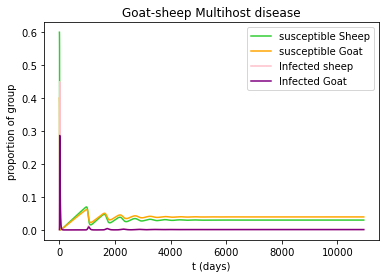

In [251]:
beta=[[0.5 , 2], [1 , 0.6]]
gamma=2/30
neu=[8e-5 , 7e-5]
m=[2.3e-5 , 2e-5]
mio=5e-5
ODEAnswer = ODESolver(ShipGoatSIR, (0,30*365 ), [0.6 ,0.4 , 0. , 0.001  ] ,dense_output=True , t_eval=np.arange(0 , 30*365 , 0.1))
plt.plot(ODEAnswer.t, ODEAnswer.y.T[:,0] , color='limegreen' , label='susceptible Sheep')
plt.plot(ODEAnswer.t, ODEAnswer.y.T[:,1] , color='orange' , label='susceptible Goat')
plt.plot(ODEAnswer.t, ODEAnswer.y.T[:,2], color='pink' ,label='Infected sheep')
plt.plot(ODEAnswer.t, ODEAnswer.y.T[:,3] , color='purple' , label='Infected Goat')
plt.ylabel('proportion of group')
plt.xlabel('t (days)')
plt.legend(loc='best')
plt.title('Goat-sheep Multihost disease')
plt.savefig(r'C:\Users\asus\Desktop\\'+'n2ame'+'.png' , dpi=200)

40.29999999999927


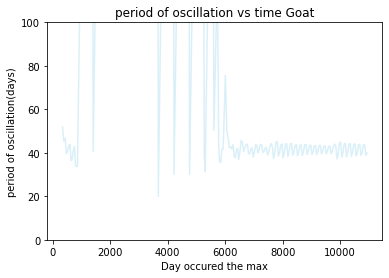

In [266]:
from scipy.signal import argrelextrema
x = np.array( ODEAnswer.y.T[:,2])
y=argrelextrema(x, np.less)
t= np.array(ODEAnswer.t)
dd=[]
xx=[]

for i in range(0 , len(y[0])):
    if i >0:
        dd.append(t[y[0][i]]-t[y[0][i-1]])
        xx.append(t[y[0][i]])
print(dd[-5])
plt.ylim(0, 100)
plt.plot(xx,dd  , alpha=0.3 ,color='skyblue')
plt.title('period of oscillation vs time Goat')
plt.ylabel('period of oscillation(days)')
plt.xlabel('Day occured the max')
plt.savefig(r'C:\Users\asus\Desktop\\'+'n4ame'+'.png' , dpi=200)